In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.metrics import average_precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Classifier/Regressor
import xgboost as xgb

# Optimization
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

# import the dataset

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [44]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

In [45]:
df.shape

(36275, 19)

In [46]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [47]:
arr = [1,2,3]
lambda arr: [list(map(lambda x:x**2, filter(lambda y:y>0,row))) for row in arr]
arr = int("".join(str(i) for i in arr))
arr

123

In [48]:

df[['no_of_adults','no_of_children']].head(1)

,no_of_adults,no_of_children
0,2,0


So far,
1. There is no missing/duplicate values in this dataset (36275 rows and 19 columns) to be dealt with.
2. Can't tell if any columns are statistically correlated at a glance. We have to dig into it by using data visulization.

## Convert categorical variable to numerical 

In [49]:
# change the 'market_segment_type' to integer
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [50]:
segment = {'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5}
df['market_segment_type'] = df['market_segment_type'].apply(lambda x: segment[x])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,1,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,2,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,2,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,2,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,2,0,0,0,94.50,0,Canceled


In [51]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [52]:
# change the 'booking_status' from string type to integer type (binary value)
df['booking_status'] = df['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace({'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3':3, 'Not Selected':0})
df['room_type_reserved'] = df['room_type_reserved'].replace({'Room_Type 1':1, 'Room_Type 4':4, 'Room_Type 2':2, 'Room_Type 6':6,
       'Room_Type 5':5, 'Room_Type 7':7, 'Room_Type 3':3 })
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,1


In [53]:
df = df.iloc[:,1:]
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [54]:
df.groupby('arrival_year')['no_of_adults'].agg('count')

arrival_year
2017     6514
2018    29761
Name: no_of_adults, dtype: int64

<AxesSubplot: >

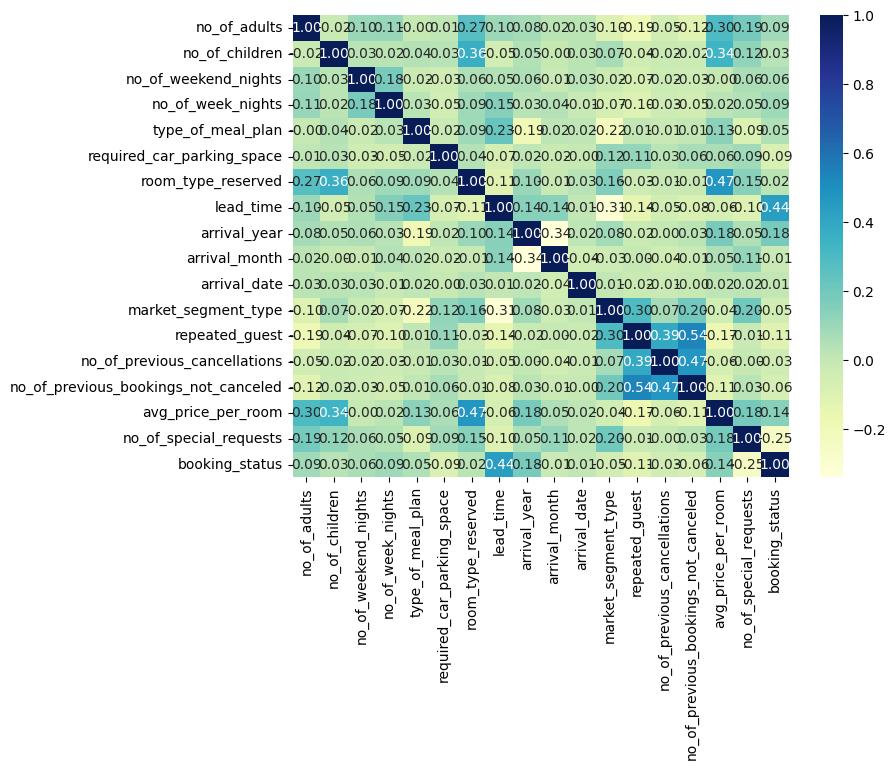

In [55]:
# Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [56]:
correlation = df.corr()['booking_status'].abs().sort_values(ascending = False)
correlation

booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
repeated_guest                          0.107287
no_of_week_nights                       0.092996
no_of_adults                            0.086920
required_car_parking_space              0.086185
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
type_of_meal_plan                       0.049374
market_segment_type                     0.048733
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
room_type_reserved                      0.022986
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64

We can see that 'lead_time'plays an important role in the cancellation, and 'no_of_special_requests' follows up.

In [57]:
# dropping columns that are not useful nor interesting

useless_col = ['arrival_date', 'no_of_children']

df.drop(useless_col, axis = 1, inplace = True)

<Figure size 1200x1100 with 0 Axes>

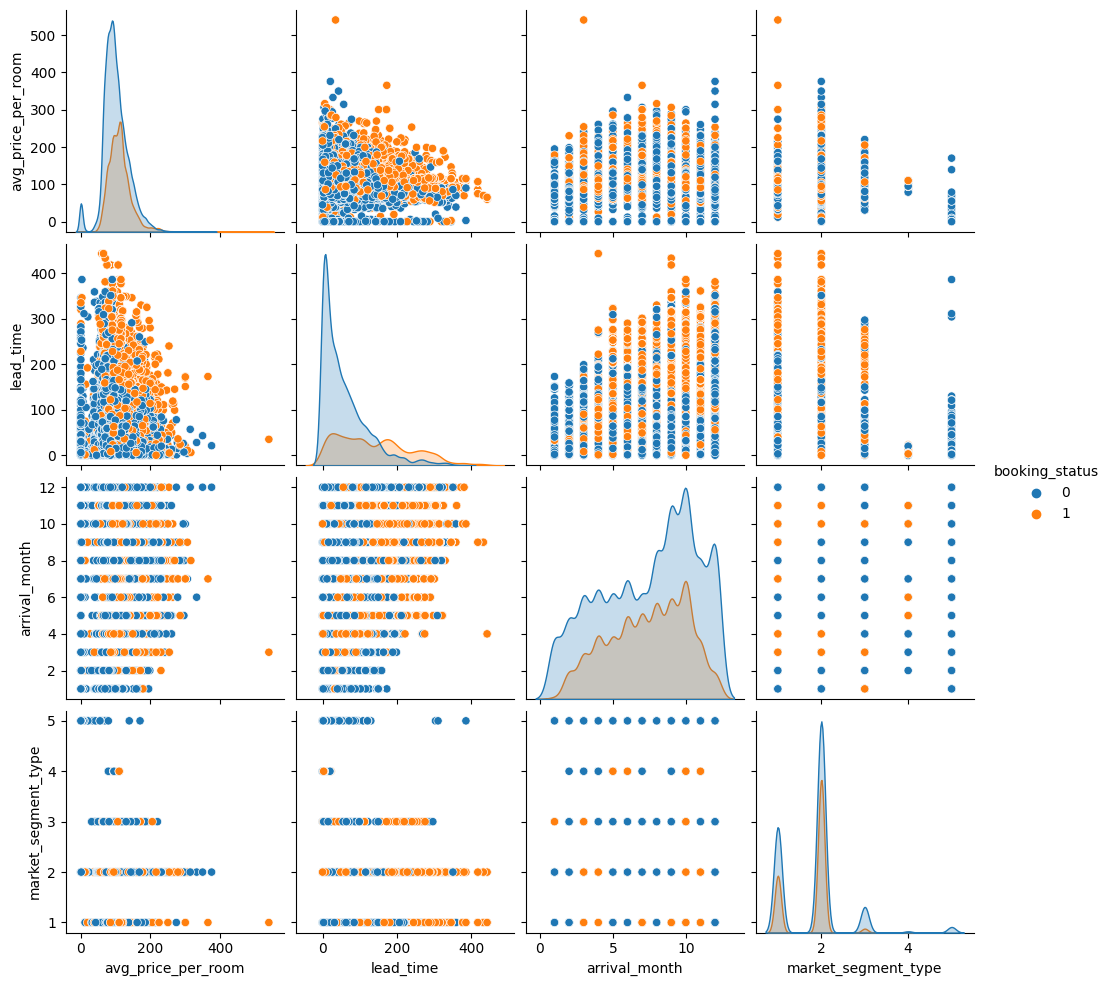

In [58]:
plt.figure(figsize=(12,11))
sns.pairplot(df[['avg_price_per_room', 'lead_time', 'arrival_month', 'market_segment_type', 'booking_status']], hue='booking_status')
# The diagonal line shows the distribution of values in that variable using a histogram. 
# Each other cell shows the relationship as a scatterplot between the two variables at their intersection.

market_segment_type = {'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5}
1. Online booking tends to be cancelled more often than other segments.
2. Online booking over $300 per room has smaller chance to cancel.

## avg price by month?

In [59]:
ttl_guests = df.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
ttl_guests.columns=['month','avg price per room']
ttl_guests

,month,avg price per room
0,1,74.749763
1,2,80.733644
2,3,91.883698
3,4,101.998801
4,5,113.810677
5,6,111.966500
6,7,111.649318
7,8,113.203984
8,9,115.906916
9,10,104.460873


In [60]:
px.line(ttl_guests, x = 'month', y = ['avg price per room'],
        title='Avg price per room per month', template = 'plotly_dark')

<AxesSubplot: xlabel='booking_status', ylabel='count'>

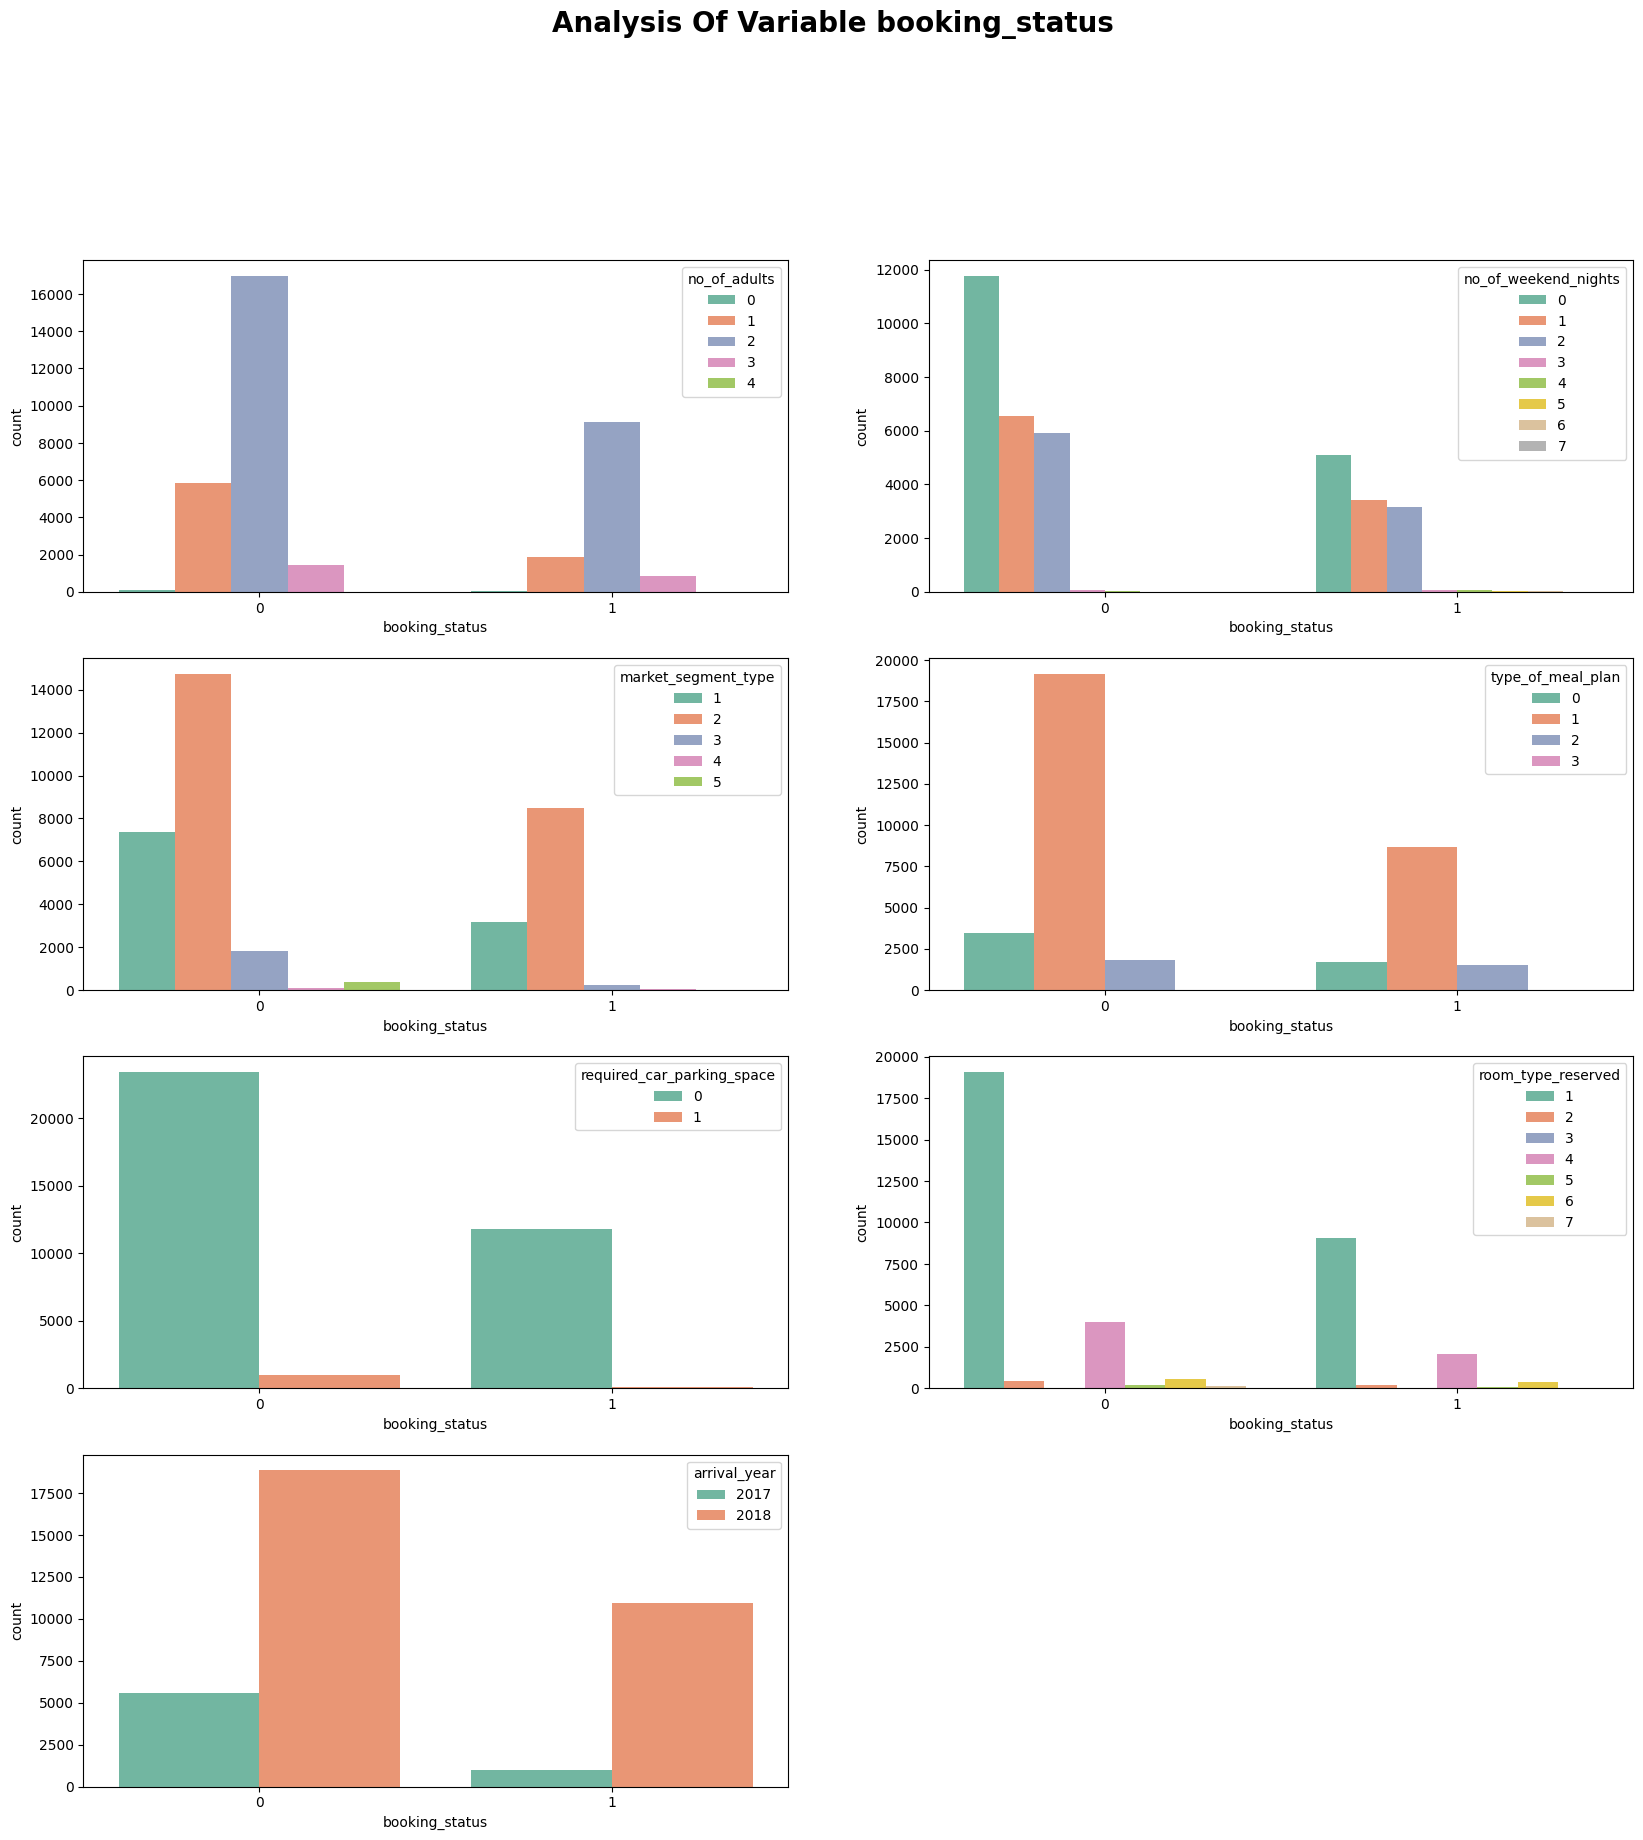

In [61]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

From the above plots, we can see:
1. single traveler has less cancellations
2. The more weekened nights, the more cancellations
3. Although the cancellations in 2017 are much less than in 2018, this is because the dataset is imbalanced. 2018 has 4 more times data than 2017 has.

In [62]:
# count the room_type
P = df.groupby('room_type_reserved')['no_of_adults'].agg('count')
P

room_type_reserved
1    28130
2      692
3        7
4     6057
5      265
6      966
7      158
Name: no_of_adults, dtype: int64

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/4187558839.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/4187558839.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/4187558839.py:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/4187558839.py:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




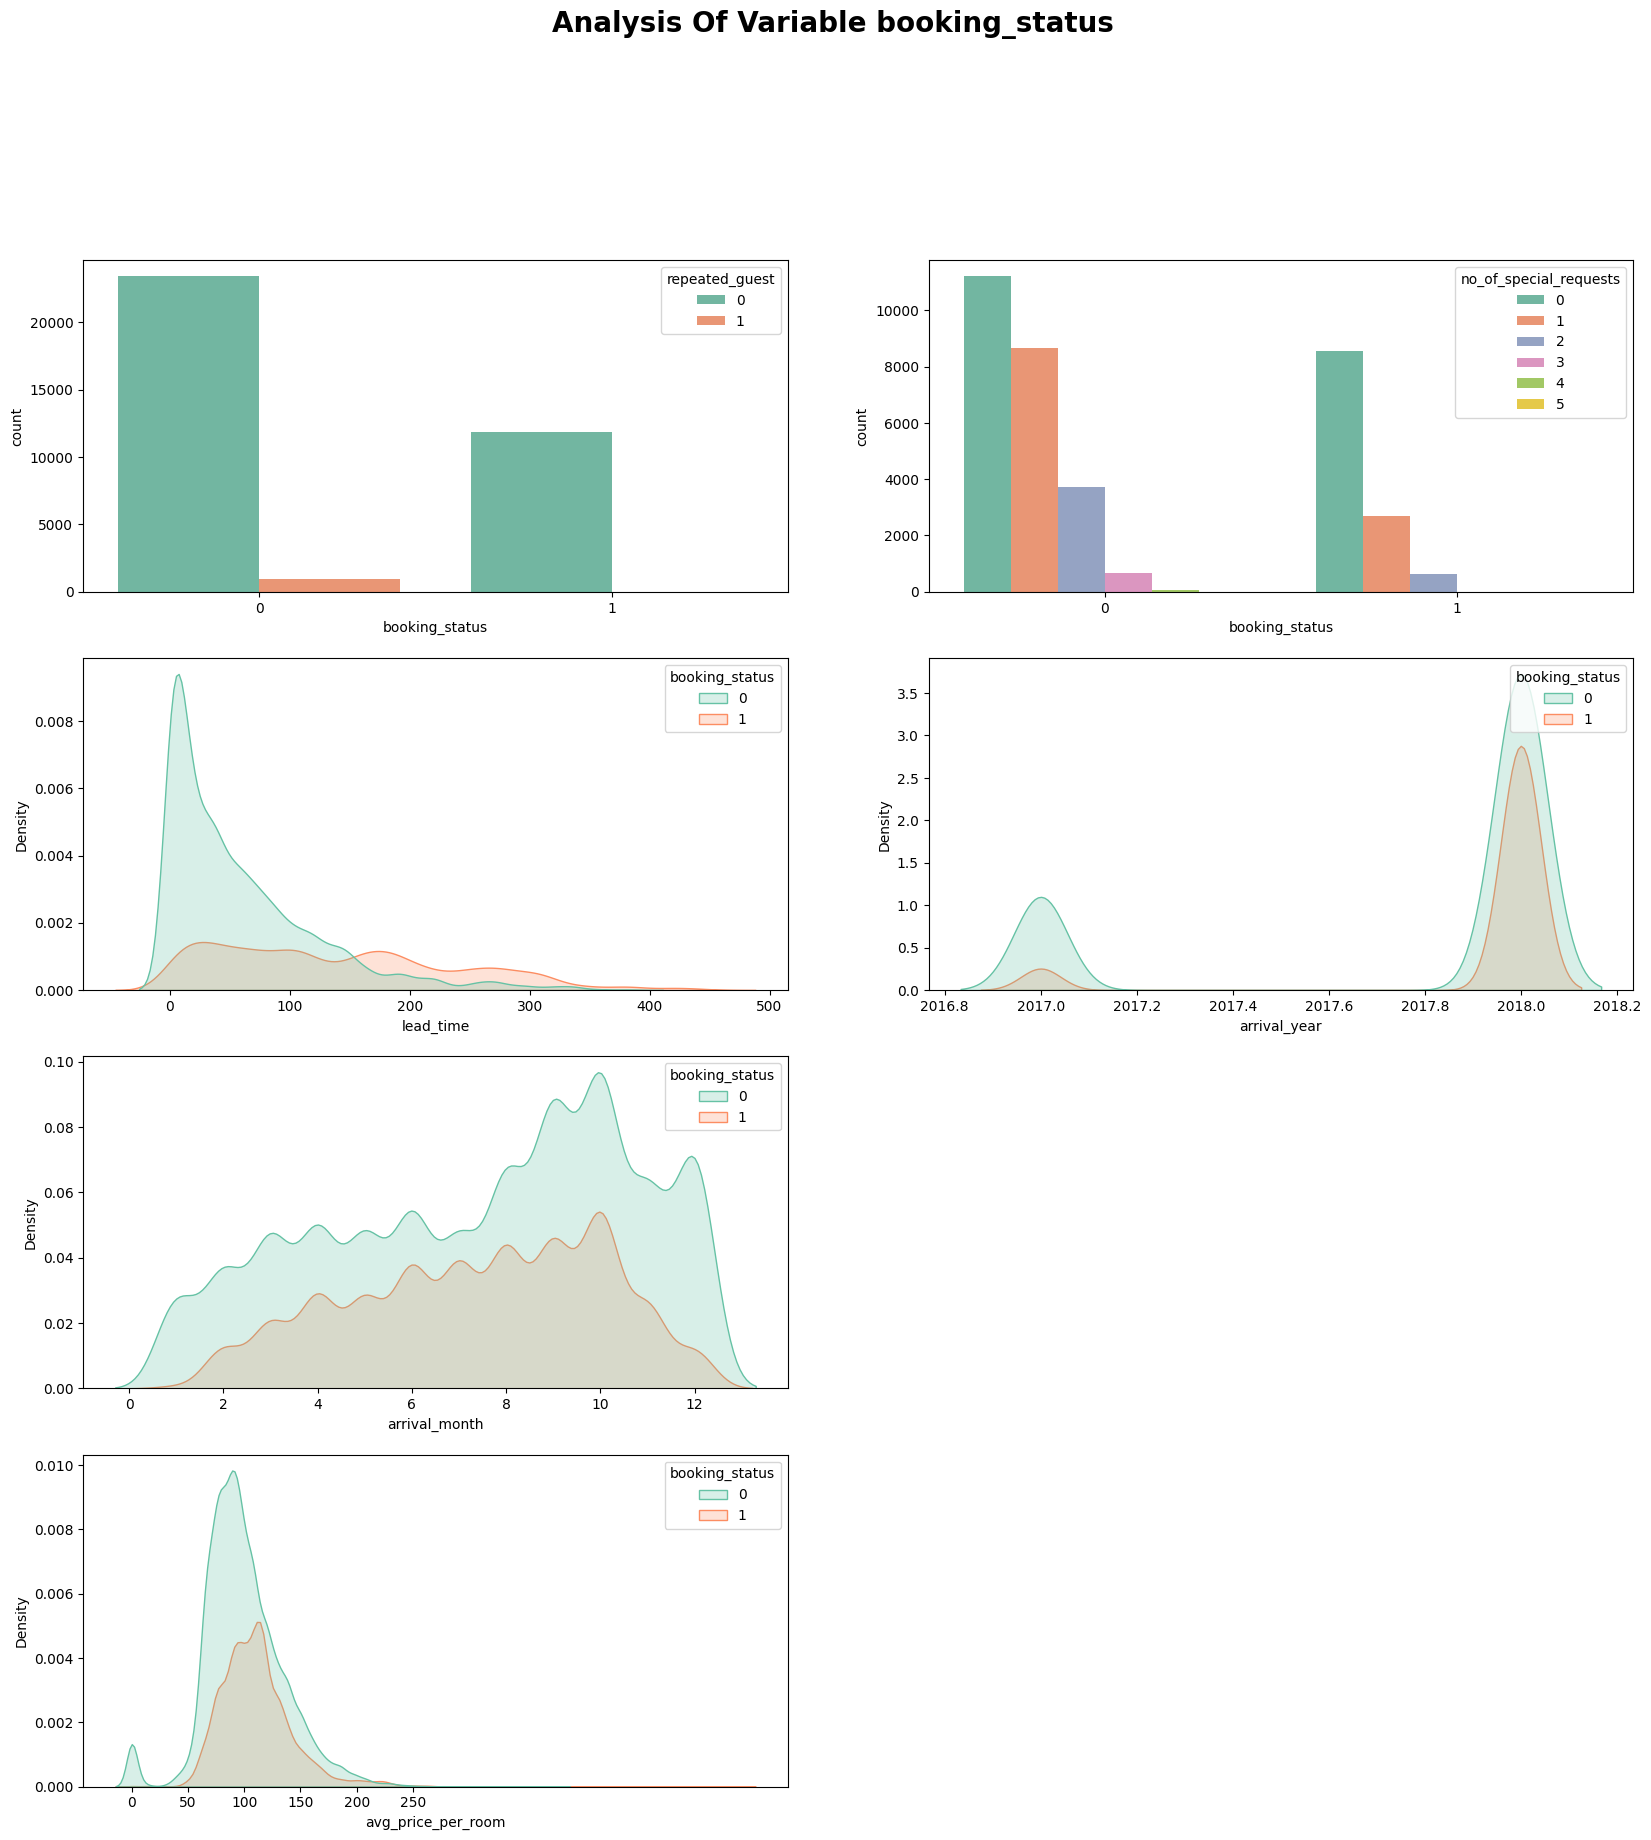

In [63]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df).set_xticks(range(0,300,50))

1. average_price_per_room between $120  to  $130 has the highest possibility to cancel
2. lead_time over 150 has more than 50% chance to cancel.
3. 2018 has higher ratio than 2017 to cancel

In [64]:
# How many repeated guest cancelled?
df[(df['repeated_guest']==1) & (df['booking_status']==1)]["no_of_adults"].count()

16

In [65]:
# How many repeated guest didn't cancel?
df[(df['repeated_guest']==1) & (df['booking_status']==0)]["no_of_adults"].count()

914

In [66]:
# How many non-repeated guest cancelled?
df[(df['repeated_guest']==0) & (df['booking_status']==1)]["no_of_adults"].count()

11869

In [67]:
# How many non-repeated guest didn't cancel?
df[(df['repeated_guest']==0) & (df['booking_status']==0)]["no_of_adults"].count()

23476

Repeated guest has significantly smaller cancellation rate.

## lead_time

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/1832482653.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/1832482653.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/1832482653.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_6371/1832482653.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: xlabel='lead_time', ylabel='Density'>

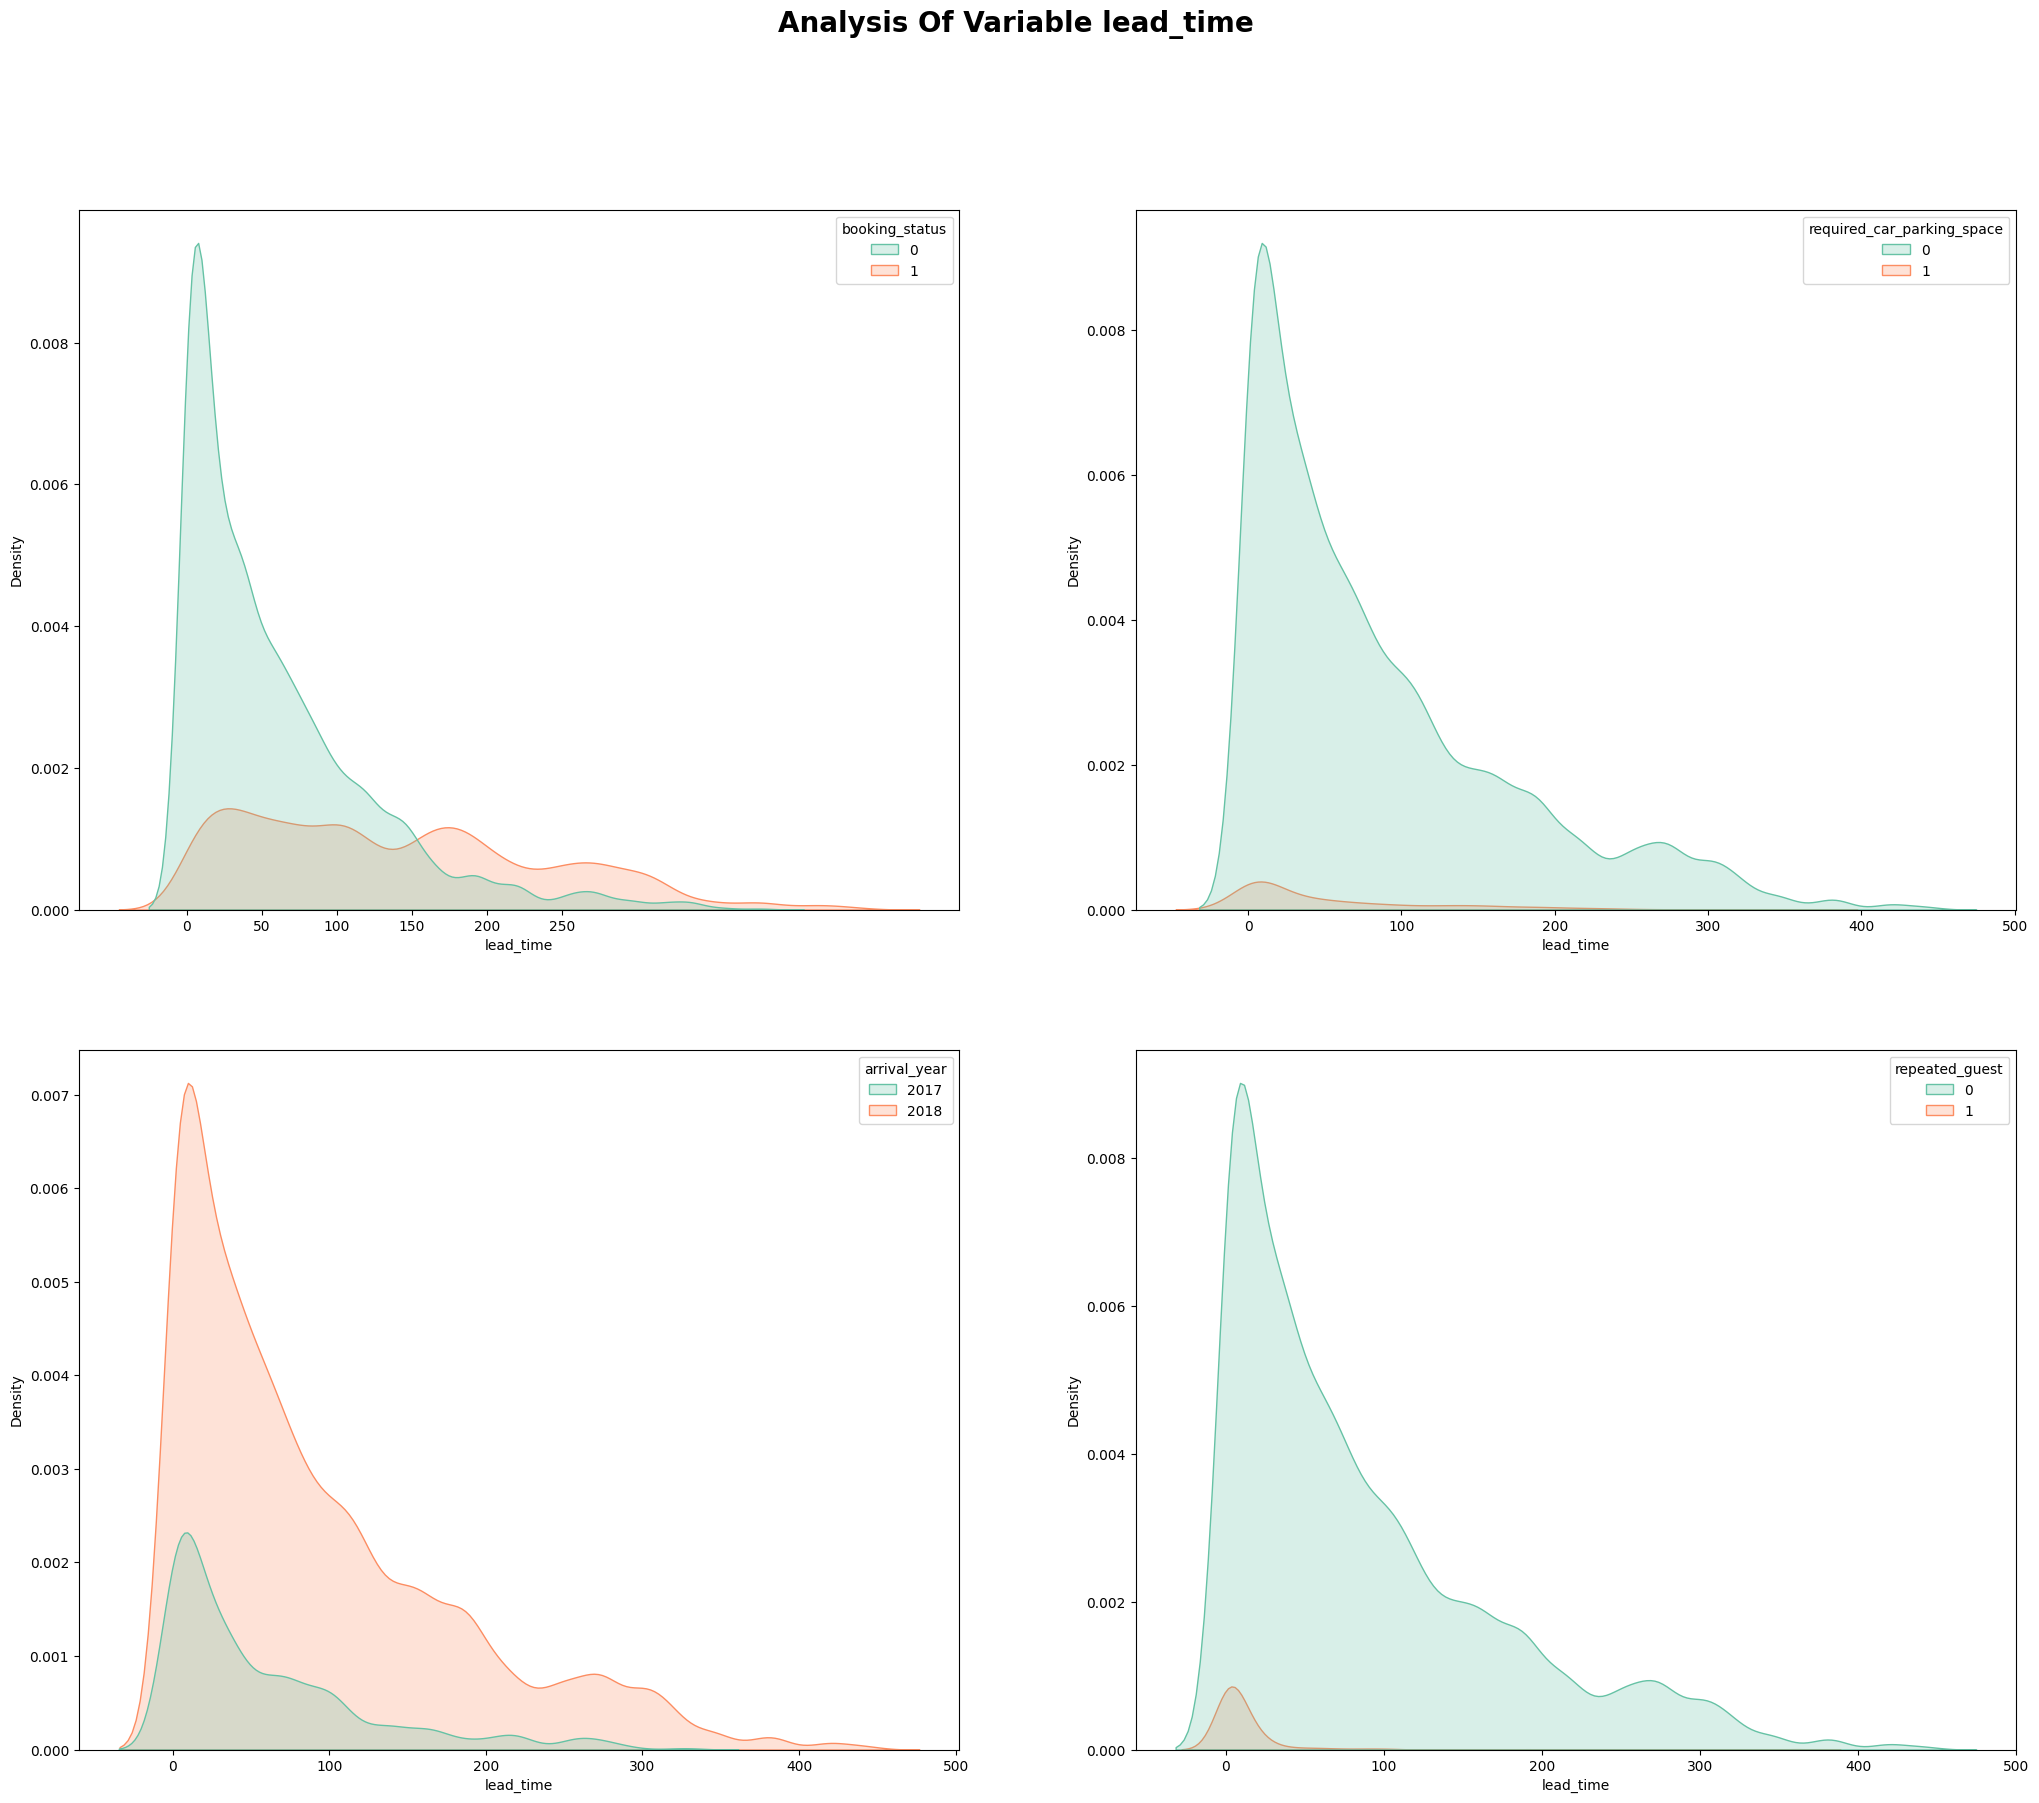

In [68]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df).set_xticks(range(0,300,50))

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

<AxesSubplot: xlabel='lead_time', ylabel='avg_price_per_room'>

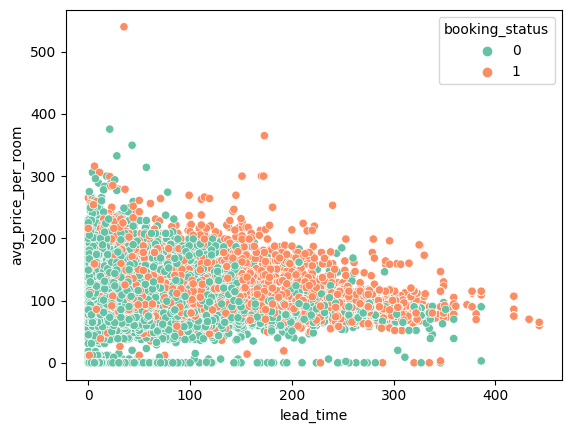

In [69]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

## Normalization

In [70]:
# normalizing all numerical variables
num_df = df.copy(deep=True)
num_df = np.log(num_df.iloc[:,:-1]+1) # +1 is because there are some values, 0, in df.
num_df

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.098612,0.693147,1.098612,0.693147,0.0,0.693147,5.416100,7.609862,2.397895,0.693147,0.0,0.0,0.0,4.189655,0.000000
1,1.098612,1.098612,1.386294,0.000000,0.0,0.693147,1.791759,7.610358,2.484907,1.098612,0.0,0.0,0.0,4.679164,0.693147
2,0.693147,1.098612,0.693147,0.693147,0.0,0.693147,0.693147,7.610358,1.098612,1.098612,0.0,0.0,0.0,4.110874,0.000000
3,1.098612,0.000000,1.098612,0.693147,0.0,0.693147,5.356586,7.610358,1.791759,1.098612,0.0,0.0,0.0,4.615121,0.000000
4,1.098612,0.693147,0.693147,0.000000,0.0,0.693147,3.891820,7.610358,1.609438,1.098612,0.0,0.0,0.0,4.559126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.386294,1.098612,1.945910,0.693147,0.0,1.609438,4.454347,7.610358,2.197225,1.098612,0.0,0.0,0.0,5.128715,0.693147
36271,1.098612,0.693147,1.386294,0.693147,0.0,0.693147,5.433722,7.610358,2.397895,1.098612,0.0,0.0,0.0,4.521245,1.098612
36272,1.098612,1.098612,1.945910,0.693147,0.0,0.693147,5.003946,7.610358,2.079442,1.098612,0.0,0.0,0.0,4.599052,1.098612
36273,1.098612,0.000000,1.386294,0.000000,0.0,0.693147,4.158883,7.610358,1.609438,1.098612,0.0,0.0,0.0,4.559126,0.000000


# Building the ML

In [71]:
# Feature Selection
X = num_df.copy(deep=True)
# Target
y = df['booking_status']

In [72]:
X.shape, y.shape

((36275, 15), (36275,))

In [73]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

PR AUC of Logistic Regression is : 0.5606381476951482
Confusion Matrix : 
[[6433  851]
 [1452 2147]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7284
           1       0.72      0.60      0.65      3599

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



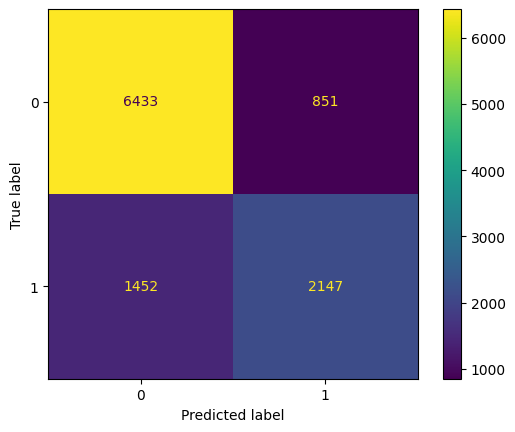

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Cuz this dataset is imbalanced, I chose F1 score to do the evaluation instead of accuracy or ROC AUC
pr_auc = average_precision_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)


print(f"PR AUC of Logistic Regression is : {pr_auc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ConfusionMatrixDisplay(confusion_matrix = conf).plot()
plt.show()

PR AUC of XGBoost Classifier is : 0.7434228462855222
Confusion Matrix : 
[[6816  468]
 [ 780 2819]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7284
           1       0.86      0.78      0.82      3599

    accuracy                           0.89     10883
   macro avg       0.88      0.86      0.87     10883
weighted avg       0.88      0.89      0.88     10883



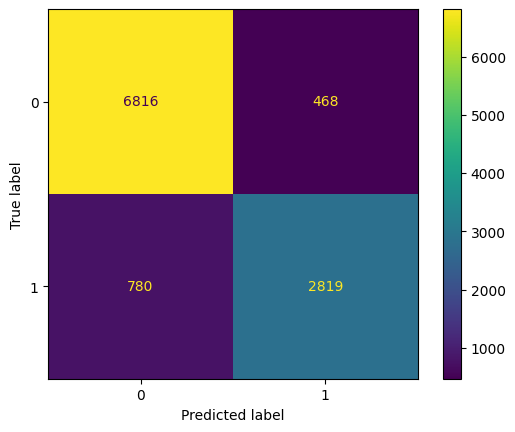

In [75]:
xgbc = xgb.XGBClassifier(booster = 'gbtree')
xgbc.fit(X_train, y_train)

y_pred_xgb = xgbc.predict(X_test)

pr_auc = average_precision_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"PR AUC of XGBoost Classifier is : {pr_auc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ConfusionMatrixDisplay(confusion_matrix = conf).plot()
plt.show()

## Feature Generation and Feature Selection to Raise the PR AUC of XGBoost

Feature importance can be defined as a type of classification for each feature on how much can that feature contribute for the predictions. That can be done in many ways, but one that is used here is lightgbm, that is a model based on desicion tree and every type of model based on that, such as random forest, xgboost, gradient boost and etc can return this information.


The correlation matrix is calculated using Pearson's, and it tells us how much the features are related to each other. When they are positive, they move in the same direction, and when they are negative, they move in the opposite direction. Features that are closer to 1  or -1 are more related, and those that are closer to 0 have no correlation at all. This information can be used to create some features in feature generation, where we can look to match features with a certain degree of correlation; in this case, just one correlation was used to create a new feature. which lead_time (one of the most important features) has a considerable degree of correlation with the number of week nights.

In [76]:
# Feature Generation
num_df['fg1'] = num_df[['lead_time','market_segment_type']].apply(lambda x: (x[0]*x[1]),axis=1)
num_df['fg1'] = np.log(num_df['fg1']+1) # +1 is because there are some values, 0, in df.

# Feature Selection
X = num_df.copy(deep=True)

# Target
y = df['booking_status']

PR AUC of XGBoost Classifier is : 0.7429687046196788
Confusion Matrix : 
[[6837  505]
 [ 714 2827]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7342
           1       0.85      0.80      0.82      3541

    accuracy                           0.89     10883
   macro avg       0.88      0.86      0.87     10883
weighted avg       0.89      0.89      0.89     10883



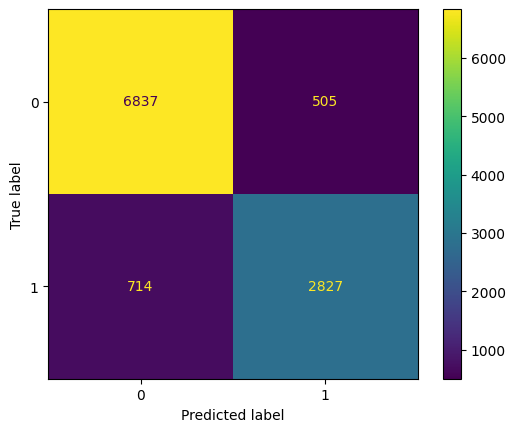

In [77]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

xgbc = xgb.XGBClassifier(booster = 'gbtree')
xgbc.fit(X_train, y_train)

y_pred_xgb = xgbc.predict(X_test)

pr_auc = average_precision_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"PR AUC of XGBoost Classifier is : {pr_auc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ConfusionMatrixDisplay(confusion_matrix = conf).plot()
plt.show()

PR AUC wasn't raised after doing the further feature generation and feature selection.

In [101]:
# Feature Selection: not include 'fg1'
X = num_df.loc[:, num_df.columns != 'fg1'] 

# Target
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Optimization Using Grid search

In [144]:
# XGBoost has quite a lot of hyperparameters that we can tune
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learnin

In [100]:

xgbc

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [193]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

# All of the parameters are defined here: https://xgboost.readthedocs.io/en/latest/parameter.html
# Parameters that we are going to tune:
params = {
    'max_depth': (2, 20),
    'n_estimators': (60, 500),
    'eta': (0.1, 0.01, 0.05, 1.0),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)
}

    
    
grid_search = GridSearchCV(estimator=estimator, param_grid=params, scoring='average_precision', 
                        n_jobs = -1, cv = None, verbose=True) 

#Training and Prediction

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[23:50:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[23:50:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[23:50:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[23:50:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[23:51:41] WARNING: /Users/

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample': (1.0, 1.0), 'eta': (0.1, 0.01, 0.05, 1.0),
                         'gamma': (0, 5), 'max_depth': (2, 20),
                         'n_estimators': (60, 500), 'subsample': (1.0, 1.0)},
             scoring='average_precision', verbose=True)

In [194]:
# get the best parameter combination
grid_search.best_params_

{'colsample': 1.0,
 'eta': 0.05,
 'gamma': 0,
 'max_depth': 20,
 'n_estimators': 500,
 'subsample': 1.0}

PR AUC of XGBoost Classifier is : 0.7593356979338266
Confusion Matrix : 
[[6850  468]
 [ 677 2888]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7318
           1       0.86      0.81      0.83      3565

    accuracy                           0.89     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



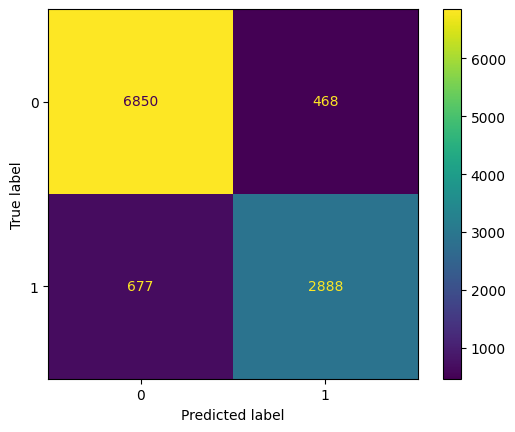

In [195]:
# the best model trained by GridSearch
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

pr_auc = average_precision_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"PR AUC of XGBoost Classifier is : {pr_auc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ConfusionMatrixDisplay(confusion_matrix = conf).plot()
plt.show()

## Optimization Using Bayesian Optimization

In [199]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (60, 500),
    'max_depth': (2, 20),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}
def xgboost_hyper_param(learning_rate, n_estimators, max_depth, subsample, colsample, gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    xgbc = xgb.XGBClassifier( max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
         subsample=subsample, colsample=colsample, gamma=gamma)
    return np.mean(cross_val_score(xgbc, X, y, cv=None, scoring='average_precision'))

In [200]:
optimizer = BayesianOptimization( f=xgboost_hyper_param, pbounds=pbounds, random_state=1)
optimizer.maximize(init_points=3, n_iter=24, acq='ei', xi=0.01)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
[01:50:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[01:50:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[01:50:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[01:50:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

[01:50:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/

In [201]:
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

Best result: {'colsample': 1.0, 'gamma': 1.7278036352152388, 'learning_rate': 0.40279979948836325, 'max_depth': 11.698701212060424, 'n_estimators': 244.44558633744973, 'subsample': 1.0}; f(x) = 0.9255527109183275.


[05:32:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample" } are not used.

PR AUC of XGBoost Classifier is : 0.7560074151876777
Confusion Matrix : 
[[6841  477]
 [ 685 2880]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7318
           1       0.86      0.81      0.83      3565

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



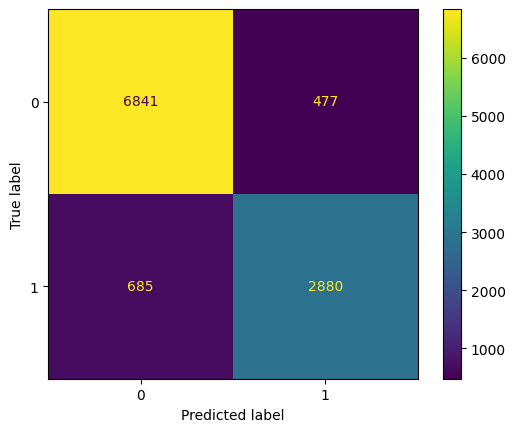

In [205]:
xgbc = xgb.XGBClassifier(booster = 'gbtree', colsample = 1.0, gamma = 1.7278036352152388, 
                         learning_rate= 0.40279979948836325, max_depth = 11, n_estimators= 244, subsample = 1.0)
xgbc.fit(X_train, y_train)

y_pred_xgb = xgbc.predict(X_test)

pr_auc = average_precision_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"PR AUC of XGBoost Classifier is : {pr_auc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ConfusionMatrixDisplay(confusion_matrix = conf).plot()
plt.show()